In [9]:
# Load the data set employees_aatrition_dataset_10000.csv into a pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

# Load the data set
test = pd.read_csv('test.csv')

### Transform the data to only numerical values

In [10]:
# Binary mapping
binary_map = {
    "Gender": {"Male": 0, "Female": 1},
    "OverTime": {"No": 0, "Yes": 1},
    "Over18": {"N": 0, "Y": 1}
}

for col, mapping in binary_map.items():
    if col in test.columns:
        test[col] = test[col].map(mapping)

# One-hot encoding for multi-class categorical columns
categorical_cols = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"]
test = pd.get_dummies(test, columns=categorical_cols)
# Convert all boolean (True/False) columns to integers (0/1)
test = test.astype({col: int for col in test.select_dtypes(include='bool').columns})


In [11]:
# save the data set to a csv file
test.to_csv('test_processed.csv', index=False)

# Print the first 5 rows of the data set
print(test.head())
# Print the shape of the data set
print(test.shape)


   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   34        790                24          4              1            1489   
1   35        660                 7          1              1            1492   
2   24        381                 9          3              1            1494   
3   24        830                13          2              1            1495   
4   44       1193                 2          1              1            1496   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  ...  \
0                        1       1          40               2  ...   
1                        4       0          76               3  ...   
2                        2       0          89               3  ...   
3                        4       1          78               3  ...   
4                        2       0          86               3  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0 

In [12]:
# Basic Summary Statistics
print(test.describe())

              Age    DailyRate  DistanceFromHome   Education  EmployeeCount  \
count  412.000000   412.000000        412.000000  412.000000          412.0   
mean    36.584951   784.364078          9.742718    3.000000            1.0   
std      8.389257   390.361319          8.258996    1.001216            0.0   
min     18.000000   104.000000          1.000000    1.000000            1.0   
25%     31.000000   464.750000          2.000000    2.000000            1.0   
50%     35.500000   740.500000          8.000000    3.000000            1.0   
75%     42.000000  1147.750000         15.000000    4.000000            1.0   
max     60.000000  1495.000000         29.000000    5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction      Gender  HourlyRate  \
count      412.000000               412.000000  412.000000  412.000000   
mean      1777.565534                 2.745146    0.364078   66.526699   
std        166.285256                 1.094379    0.481756   20.35

### Correlation 

In [13]:
def show_high_correlations(test, threshold):
    corr_matrix = test.corr().abs()  # absolute value of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # upper triangle only

    # Find index pairs with correlation above threshold
    high_corr = upper.stack()[upper.stack() > threshold].sort_values(ascending=False)

    if not high_corr.empty:
        print("Highly correlated feature pairs (>|{:.2f}|):\n".format(threshold))
        for (feat1, feat2), corr_val in high_corr.items():
            print(f"{feat1} ↔ {feat2} : correlation = {corr_val:.3f}")
    else:
        print(f"No feature pairs with correlation above {threshold}.")

# Example usage:
show_high_correlations(test, threshold=0.6)


Highly correlated feature pairs (>|0.60|):

JobLevel ↔ MonthlyIncome : correlation = 0.938
Department_Human Resources ↔ JobRole_Human Resources : correlation = 0.934
Department_Research & Development ↔ Department_Sales : correlation = 0.873
Department_Sales ↔ JobRole_Sales Executive : correlation = 0.814
YearsAtCompany ↔ YearsWithCurrManager : correlation = 0.791
PercentSalaryHike ↔ PerformanceRating : correlation = 0.783
JobLevel ↔ TotalWorkingYears : correlation = 0.766
MonthlyIncome ↔ TotalWorkingYears : correlation = 0.755
YearsAtCompany ↔ YearsInCurrentRole : correlation = 0.748
BusinessTravel_Travel_Frequently ↔ BusinessTravel_Travel_Rarely : correlation = 0.740
Department_Research & Development ↔ JobRole_Sales Executive : correlation = 0.711
YearsInCurrentRole ↔ YearsWithCurrManager : correlation = 0.694
Department_Human Resources ↔ EducationField_Human Resources : correlation = 0.681
EducationField_Human Resources ↔ JobRole_Human Resources : correlation = 0.665
Age ↔ TotalWorki

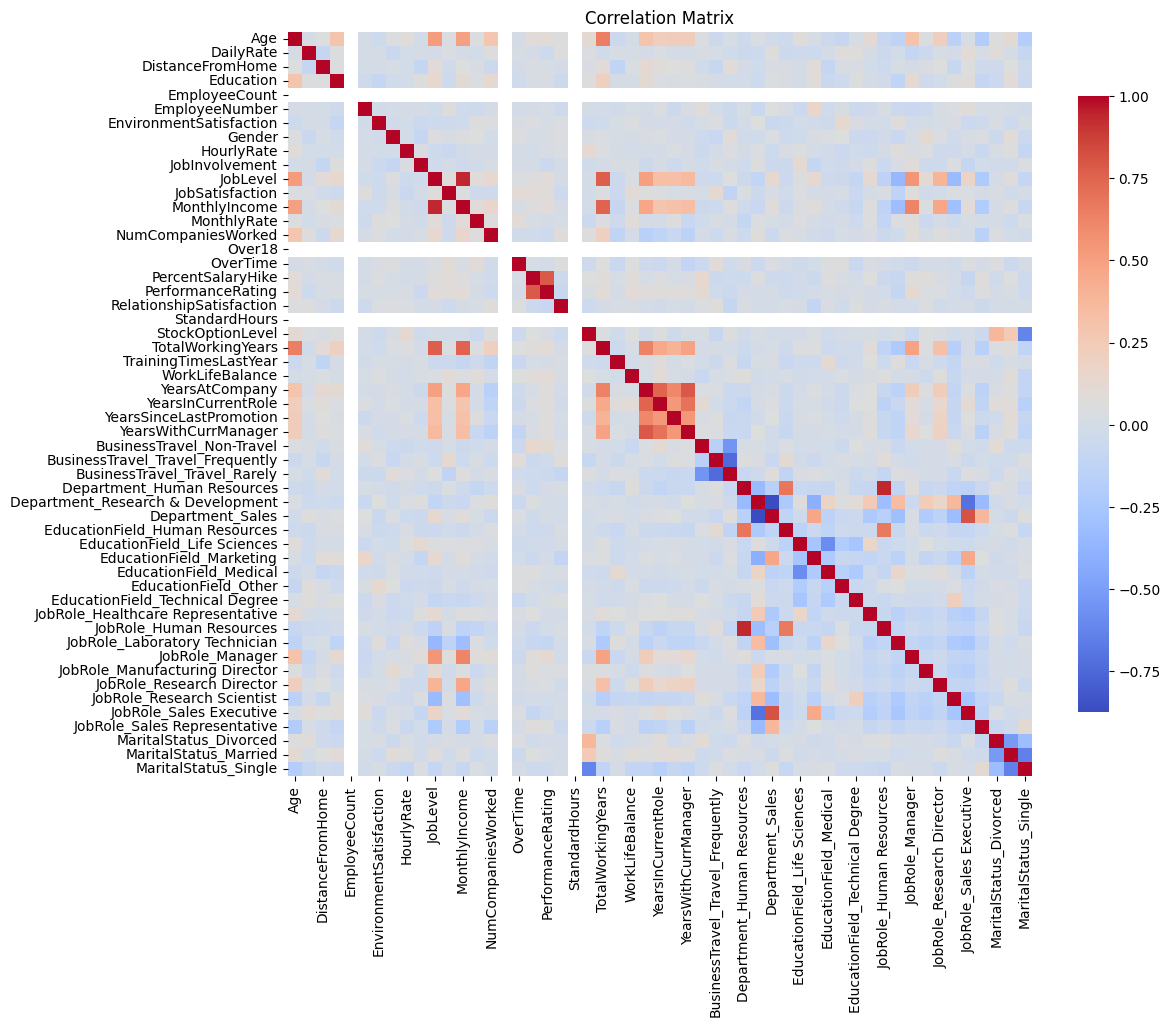

In [14]:
# Make a correlation matrix and print save it to a file
def plot_correlation_matrix(data):
    # Calculate the correlation matrix
    corr = test.corr()
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))
    # Draw the heatmap without annotations
    sns.heatmap(corr, cmap='coolwarm', annot=False, square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix')
    plt.savefig('correlation_matrix.png')
    plt.show()
# Plot the correlation matrix
plot_correlation_matrix(test)